# Tarea 2: Centralidad de nodos
## Tópicos selectos de Ciencia de datos
### Luis David Huante García

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Descarga los archivos airportRutes.csv y airport-codes.xls de nuestro sitio en Classroom. Del primer archivo nos interesan las columnas Origin y Destination, que describen vuelos que existen entre aeropuertos del mundo. Cada aeropuerto está representado por su clave de tres letras de acuerdo a la International Air Transport Association (IATA). Para saber en dónde se ubican estos aeropuertos, puedes consultar la información en el segundo archivo, airport-codes.

In [ ]:
df_routes = pd.read_csv('airportRoutes.csv')
columns_to_keep = ['ORIGIN', 'Destination']
df_routes = df_routes[columns_to_keep]; df_routes

,ORIGIN,Destination
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
61411,CTU,HAN
61412,CXR,DAD
61413,CXR,DME
61414,CXR,HAN


In [ ]:
G = nx.from_pandas_edgelist(df_routes, 'ORIGIN', 'Destination'); G.nodes()

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'OVB', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'LED', 'SVX', 'NJC', 'NUX', 'BTK', 'IKT', 'HTA', 'KCK', 'ODO', 'UKX', 'ULK', 'YKS', 'MJZ', 'AYP', 'LIM', 'CUZ', 'PEM', 'HUU', 'IQT', 'PCL', 'TPP', 'ABJ', 'BOY', 'OUA', 'ACC', 'BKO', 'DKR', 'COO', 'LFW', 'NIM', 'BOG', 'GYE', 'UIO', 'CLO', 'SCY', 'OCC', 'BDS', 'ZRH', 'BOD', 'BRS', 'GVA', 'LPA', 'LCA', 'RMF', 'TFS', 'AJR', 'LYC', 'ARN', 'GEV', 'HAD', 'JKG', 'KRF', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VBY', 'VHM', 'VXO', 'HMV', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KOZ', 'OLH', 'KZB', 'SYB', 'KYK', 'ORI', 'KPR', 'BSO', 'MNL', 'BXU', 'CBO', 'CGY', 'CRM', 'DGT', 'DWC', 'GES', 'KLO', 'LGP', 'MPH', 'OZC', 'PPS', 'RXS', 'SUG', 'TUG', 'ZAM', 'AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTN', 'KTB', 'MTM', 'LOS', 'ROB', 'BCN', 'BJL', 'FNA', 'CKY', 'OX

In [ ]:
G.order(), G.size()

(3218, 18209)

In [ ]:
len(df_routes.ORIGIN.unique())

3202

In [ ]:
df_codes = pd.read_excel('airport-codes.xls'); df_codes
df_routes.rename(columns={'ORIGIN': 'Airport Code'}, inplace=True)

In [ ]:
df = pd.merge(df_routes, df_codes, on='Airport Code', how='inner'); df

,Airport Code,Destination,City name,Airport Name,Country name,Country Abbrev.,World Area Code
0,AER,KZN,Adler/Sochi,Adler/Sochi,Russian Federation,RU,770
1,AER,DYU,Adler/Sochi,Adler/Sochi,Russian Federation,RU,770
2,AER,KIV,Adler/Sochi,Adler/Sochi,Russian Federation,RU,770
3,AER,MSQ,Adler/Sochi,Adler/Sochi,Russian Federation,RU,770
4,AER,TAS,Adler/Sochi,Adler/Sochi,Russian Federation,RU,770
...,...,...,...,...,...,...,...
60192,DLI,SGN,Dalat,Lienkhang,Viet Nam,VN,791
60193,HUI,HAN,Hue,Phu Bai,Viet Nam,VN,791
60194,HUI,SGN,Hue,Phu Bai,Viet Nam,VN,791
60195,UIH,SGN,Qui Nhon,Qui Nhon,Viet Nam,VN,791


2. Queremos combinar la información de ambos archivos para crear el grafo de
vuelos existentes al interior de los siguientes paises:

* México

  Para filtrar las ubicaciones exteriores a México, definimos una lista de nodos locales y una lista de paises por borrar. Obtenemos la diferencia con una función lambda y filtramos los valores con la función `isin`, ya que si hay alguna ocurrencia de un código extranjero en la columna **Destination**, lo elimininamos.

In [ ]:
mexico_df =  df[df['Country name'] == 'Mexico']; mexico_df

,Airport Code,Destination,City name,Airport Name,Country name,Country Abbrev.,World Area Code
23443,ACA,MEX,Acapulco,General Juan N. Alvarez International,Mexico,MX,0
23444,ACA,TLC,Acapulco,General Juan N. Alvarez International,Mexico,MX,0
23445,ACA,MEX,Acapulco,General Juan N. Alvarez International,Mexico,MX,0
23446,ACA,TLC,Acapulco,General Juan N. Alvarez International,Mexico,MX,0
23447,ACA,IAH,Acapulco,General Juan N. Alvarez International,Mexico,MX,0
...,...,...,...,...,...,...,...
52938,SLW,IAH,Saltillo,Saltillo,Mexico,MX,148
52939,TAP,GUA,Tapachula,Tapachula International,Mexico,MX,148
52940,TAP,MEX,Tapachula,Tapachula International,Mexico,MX,148
52941,TPQ,MEX,Tepic,Tepic,Mexico,MX,148


In [ ]:
#Definimos una lista de nodos y códigos por borrar
nodes_mx = list(mexico_df['Airport Code'].unique())
codes_to_delete = list(mexico_df['Destination'].unique())

#Obtenemos la diferencia
difference = list(filter(lambda x: x not in nodes_mx, codes_to_delete))

#Filtramos el dataframe
mexico_df = mexico_df[~mexico_df['Destination'].isin(difference)]; mexico_df

#Creamos la lista de vértices
columns_to_keep = ['Airport Code', 'Destination']
edgelist_mx = mexico_df.loc[:, columns_to_keep];

Repetimos el proceso para cada país

* Canada


In [ ]:
canada_df = df[df['Country name'] == 'Canada']; canada_df

,Airport Code,Destination,City name,Airport Name,Country name,Country Abbrev.,World Area Code
5294,AKV,YIK,Akulivik,Akulivik,Canada,CA,906
5295,AKV,YPX,Akulivik,Akulivik,Canada,CA,906
5296,XGR,YVP,Kangiqsualujjuaq,Kangiqsualujjuaq,Canada,CA,906
5297,YGL,YGW,La Grande,La Grande,Canada,CA,906
5298,YGL,YPX,La Grande,La Grande,Canada,CA,906
...,...,...,...,...,...,...,...
59698,YNA,ZGS,Natashquan,Natashquan,Canada,CA,906
59699,YPN,YGV,Port Menier,Port Menier,Canada,CA,906
59700,YPN,YZV,Port Menier,Port Menier,Canada,CA,906
59701,ZGS,YIF,Gethsemani,Gethsemani,Canada,CA,906


In [ ]:
#Definimos una lista de nodos y códigos por borrar
nodes_ca = list(canada_df['Airport Code'].unique())
codes_to_delete = list(canada_df['Destination'].unique())

#Obtenemos la diferencia
difference = list(filter(lambda x: x not in nodes_ca, codes_to_delete))

#Filtramos el dataframe
canada_df = canada_df[~canada_df['Destination'].isin(difference)]; canada_df

#Creamos la lista de vértices
columns_to_keep = ['Airport Code', 'Destination']
edgelist_ca = canada_df.loc[:, columns_to_keep];

 * Colombia


In [ ]:
colombia_df = df[df['Country name'] == 'Colombia']; colombia_df

,Airport Code,Destination,City name,Airport Name,Country name,Country Abbrev.,World Area Code
1337,BOG,GYE,Bogota,Eldorado,Colombia,CO,327
1338,BOG,UIO,Bogota,Eldorado,Colombia,CO,327
1339,BOG,MEX,Bogota,Eldorado,Colombia,CO,327
1340,BOG,APO,Bogota,Eldorado,Colombia,CO,327
1341,BOG,AUC,Bogota,Eldorado,Colombia,CO,327
...,...,...,...,...,...,...,...
53225,SMR,BOG,Santa Marta,Simon Bolivar,Colombia,CO,327
53226,SMR,BOG,Santa Marta,Simon Bolivar,Colombia,CO,327
53227,TCO,CLO,Tumaco,La Florida,Colombia,CO,327
53228,VUP,BOG,Valledupar,Valledupar,Colombia,CO,327


In [ ]:
#Definimos una lista de nodos y códigos por borrar
nodes_co = list(colombia_df['Airport Code'].unique())
codes_to_delete = list(colombia_df['Destination'].unique())

#Obtenemos la diferencia
difference = list(filter(lambda x: x not in nodes_co, codes_to_delete))

#Filtramos el dataframe
colombia_df = colombia_df[~colombia_df['Destination'].isin(difference)]; colombia_df

#Creamos la lista de vértices
columns_to_keep = ['Airport Code', 'Destination']
edgelist_co = colombia_df.loc[:, columns_to_keep];

* Otro país del mundo que tú elijas



In [ ]:
#Creamos el DataFrame para Francia
france_df = df[df['Country name'] == 'France']
france_df

,Airport Code,Destination,City name,Airport Name,Country name,Country Abbrev.,World Area Code
1613,BOD,ZRH,Bordeaux,Bordeaux Airport,France,FR,427
1614,BOD,HER,Bordeaux,Bordeaux Airport,France,FR,427
1615,BOD,FCO,Bordeaux,Bordeaux Airport,France,FR,427
1616,BOD,LIL,Bordeaux,Bordeaux Airport,France,FR,427
1617,BOD,LYS,Bordeaux,Bordeaux Airport,France,FR,427
...,...,...,...,...,...,...,...
60025,DIJ,TLS,Dijon,Dijon,France,FR,427
60026,LEH,LYS,Le Havre,Octeville,France,FR,427
60027,PGX,EGC,Perigueux,Perigueux,France,FR,427
60028,PGX,ORY,Perigueux,Perigueux,France,FR,427


In [ ]:
#Definimos una lista de nodos y códigos por borrar
nodes_fr = list(france_df['Airport Code'].unique())
codes_to_delete = list(france_df['Destination'].unique())

#Obtenemos la diferencia
difference = list(filter(lambda x: x not in nodes_fr, codes_to_delete))

#Filtramos el dataframe
france_df = france_df[~france_df['Destination'].isin(difference)]; france_df

#Creamos la lista de vértices
columns_to_keep = ['Airport Code', 'Destination']
edgelist_fr = france_df.loc[:, columns_to_keep];

Para ello:
  * Utiliza pandas para cruzar la información en ambos archivos. Podrías, por ejemplo, crear dos columnas en la primera tabla que indiquen país de origen y país de destino.
  * Obtén el subconjunto de instancias en donde el país de origen y el de destino coinciden con el país de tu interés.
  * Recuerda que existen el comando pd.from pandas edgelist. Una vez que
      cuentes con las redes por países, para cada una de ellas:

3. Elabora un dibujo que señale el centro y la periferia para los aeropuertos representados.

El mapa de color presentao en los dibujos es el siguiente:
  1. Rojo si forma parte del centro.
  2. Azul si está en la periferia.
  3. Morado si no está en ningún grupo.

### México

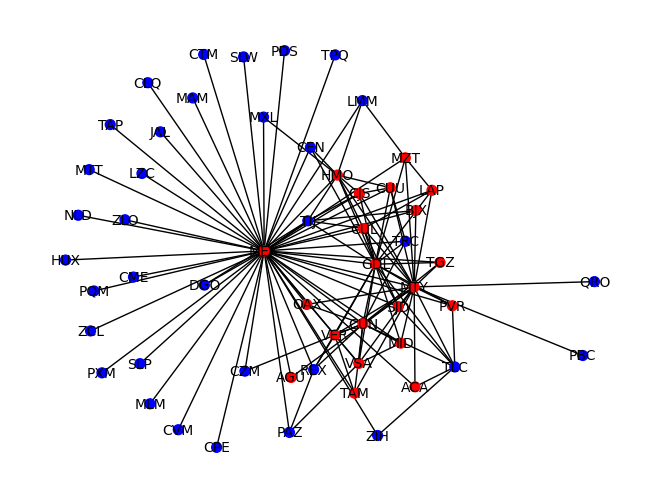

In [ ]:
#Creamos el grafo a partir del DataFrame de pandas
Mx_Graph = nx.from_pandas_edgelist(edgelist_mx, 'Airport Code', "Destination")

#Creamos el mapa de colores
color_map = ['red' if node in nx.center(Mx_Graph) else 'blue' if node in nx.periphery(Mx_Graph) else 'purple' for node in Mx_Graph.nodes]

#Imprimimos el grafo
nx.draw_spring(Mx_Graph, with_labels=True, node_size = 50, font_size=10, node_color=color_map)

### Canadá

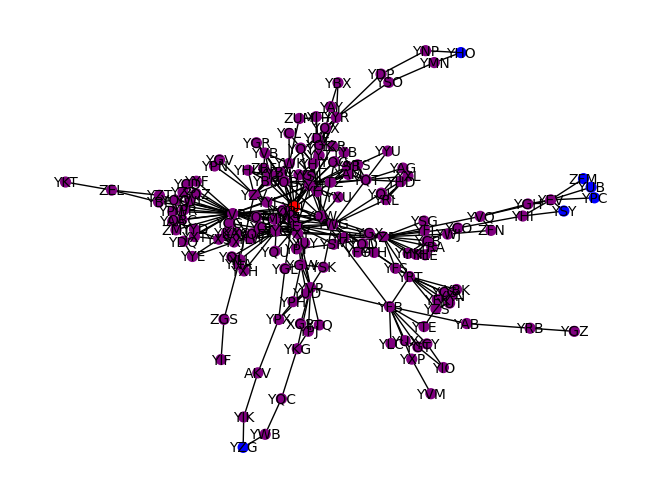

In [ ]:
#Creamos el grafo a partir del DataFrame de pandas
Ca_Graph = nx.from_pandas_edgelist(edgelist_ca, 'Airport Code', "Destination")
Ca_Graph.remove_node('CXH'); Ca_Graph.remove_node('YWH')

#Creamos el mapa de colores
color_map = ['red' if node in nx.center(Ca_Graph) else 'blue' if node in nx.periphery(Ca_Graph) else 'purple' for node in Ca_Graph.nodes]

#Imprimimos el grafo
nx.draw_spring(Ca_Graph, with_labels=True, node_size = 50, font_size=10, node_color=color_map)

### Colombia

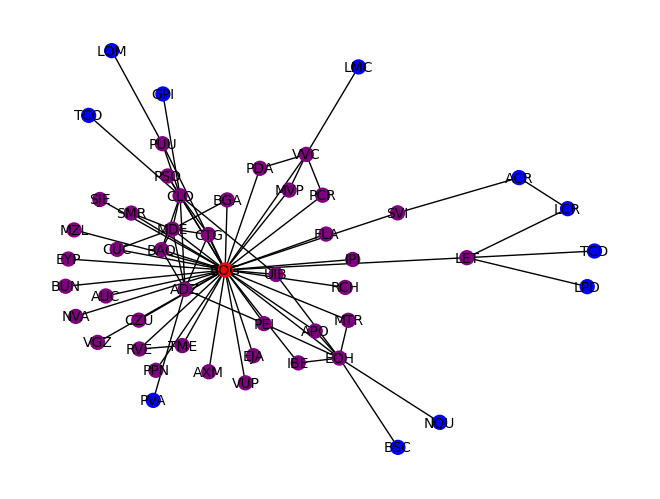

In [ ]:
#Creamos el grafo a partir del DataFrame de pandas
Co_Graph = nx.from_pandas_edgelist(edgelist_co, 'Airport Code', "Destination")

#Creamos el mapa de colores
color_map = ['red' if node in nx.center(Co_Graph) else 'blue' if node in nx.periphery(Co_Graph) else 'purple' for node in Co_Graph.nodes]

#Imprimimos el grafo
nx.draw_spring(Co_Graph, with_labels=True, node_size = 100, font_size=10, node_color=color_map)

### Francia

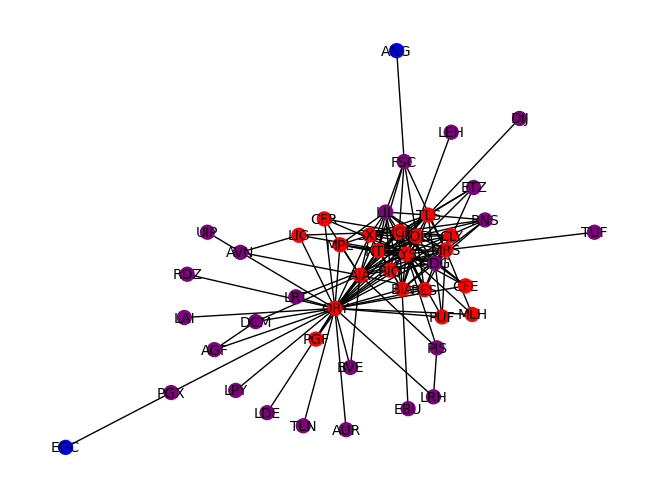

In [ ]:
#Creamos el grafo a partir del DataFrame de pandas
Fr_Graph = nx.from_pandas_edgelist(edgelist_fr, 'Airport Code', "Destination")
Fr_Graph.remove_node('BZR'); Fr_Graph.remove_node('BVA')

#Creamos el mapa de colores
# color_map = ['red' if node in nx.center(Fr_Graph) else 'blue' for node in G.nodes]
color_map = ['red' if node in nx.center(Fr_Graph) else 'blue' if node in nx.periphery(Fr_Graph) else 'purple' for node in Fr_Graph.nodes]

#Imprimimos el grafo
nx.draw_spring(Fr_Graph, with_labels=True, node_size = 100, font_size=10, node_color=color_map)

4. Calcula las centralidades de la red, y encuentra el top 10 de aeropuertos para cada una de ellas.

### México

**Centralidad de grado**

In [ ]:
mx_centrality_data = {'Airports': list(nx.degree_centrality(Mx_Graph).keys()), 'Degree Centrality': list(nx.degree_centrality(Mx_Graph).values())}
mx_centrality = pd.DataFrame(mx_centrality_data)
(mx_centrality.head(10)).sort_values(by=['Degree Centrality'], ascending = False)

,Airports,Degree Centrality
1,MEX,0.944444
3,MTY,0.425926
6,GDL,0.370370
7,HMO,0.185185
2,TLC,0.129630
8,CJS,0.111111
9,CUU,0.111111
0,ACA,0.055556
5,CEN,0.055556
4,AGU,0.037037


**Centralidad de intermediación**

In [ ]:
mx_centrality_data = {'Airports': list(nx.betweenness_centrality(Mx_Graph).keys()), 'Betwenness Centrality': list(nx.betweenness_centrality(Mx_Graph).values())}
mx_centrality = pd.DataFrame(mx_centrality_data)
(mx_centrality.head(10)).sort_values(by=['Betwenness Centrality'], ascending = False)

,Airports,Betwenness Centrality
1,MEX,0.796743
3,MTY,0.120018
6,GDL,0.039533
7,HMO,0.008924
2,TLC,0.004251
0,ACA,0.002483
9,CUU,0.000990
8,CJS,0.000524
4,AGU,0.000000
5,CEN,0.000000


**Centralidad de cercanía**

In [ ]:
mx_centrality_data = {'Airports': list(nx.closeness_centrality(Mx_Graph).keys()), 'Closeness Centrality': list(nx.closeness_centrality(Mx_Graph).values())}
mx_centrality = pd.DataFrame(mx_centrality_data)
(mx_centrality.head(10)).sort_values(by=['Closeness Centrality'], ascending = False)

,Airports,Closeness Centrality
1,MEX,0.947368
3,MTY,0.635294
6,GDL,0.613636
7,HMO,0.551020
8,CJS,0.529412
9,CUU,0.529412
0,ACA,0.514286
4,AGU,0.509434
5,CEN,0.504673
2,TLC,0.428571


**Centralidad por vectores propios**

In [ ]:
mx_centrality_data = {'Airports': list(nx.eigenvector_centrality(Mx_Graph).keys()), 'Eigenvector Centrality': list(nx.eigenvector_centrality(Mx_Graph).values())}
mx_centrality = pd.DataFrame(mx_centrality_data)
(mx_centrality.head(10)).sort_values(by=['Eigenvector Centrality'], ascending = False)

,Airports,Eigenvector Centrality
1,MEX,0.485660
3,MTY,0.340296
6,GDL,0.334450
7,HMO,0.193503
8,CJS,0.157848
9,CUU,0.155474
2,TLC,0.126053
5,CEN,0.096845
0,ACA,0.090959
4,AGU,0.078915


# Colombia

**Centralidad de grado**

In [ ]:
co_centrality_data = {'Airports': list(nx.degree_centrality(Co_Graph).keys()), 'Degree Centrality': list(nx.degree_centrality(Co_Graph).values())}
co_centrality = pd.DataFrame(co_centrality_data)
(co_centrality.head(10)).sort_values(by=['Degree Centrality'], ascending = False)

,Airports,Degree Centrality
0,BOG,0.78
5,EOH,0.16
1,APO,0.04
8,MVP,0.04
9,PCR,0.04
2,AUC,0.02
3,BUN,0.02
4,CZU,0.02
6,FLA,0.02
7,IPI,0.02


**Centralidad de intermediación**

In [ ]:
co_centrality_data = {'Airports': list(nx.betweenness_centrality(Co_Graph).keys()), 'Betwenness Centrality': list(nx.betweenness_centrality(Co_Graph).values())}
co_centrality = pd.DataFrame(co_centrality_data)
(co_centrality.head(10)).sort_values(by=['Betwenness Centrality'], ascending = False)

,Airports,Betwenness Centrality
0,BOG,0.897755
5,EOH,0.083265
1,APO,0.000000
2,AUC,0.000000
3,BUN,0.000000
4,CZU,0.000000
6,FLA,0.000000
7,IPI,0.000000
8,MVP,0.000000
9,PCR,0.000000


**Centralidad de cercanía**

In [ ]:
co_centrality_data = {'Airports': list(nx.closeness_centrality(Co_Graph).keys()), 'Closeness Centrality': list(nx.closeness_centrality(Co_Graph).values())}
co_centrality = pd.DataFrame(co_centrality_data)
(co_centrality.head(10)).sort_values(by=['Closeness Centrality'], ascending = False)

,Airports,Closeness Centrality
0,BOG,0.819672
5,EOH,0.495050
1,APO,0.467290
8,MVP,0.462963
9,PCR,0.462963
2,AUC,0.454545
3,BUN,0.454545
4,CZU,0.454545
6,FLA,0.454545
7,IPI,0.454545


**Centralidad por vectores propios**

In [ ]:
co_centrality_data = {'Airports': list(nx.eigenvector_centrality(Co_Graph).keys()), 'Eigenvector Centrality': list(nx.eigenvector_centrality(Co_Graph).values())}
co_centrality = pd.DataFrame(co_centrality_data)
(co_centrality.head(10)).sort_values(by=['Eigenvector Centrality'], ascending = False)

,Airports,Eigenvector Centrality
0,BOG,0.618042
5,EOH,0.172755
1,APO,0.107613
8,MVP,0.101511
9,PCR,0.101511
2,AUC,0.084104
3,BUN,0.084104
4,CZU,0.084104
6,FLA,0.084104
7,IPI,0.084104


# Canadá

**Centralidad de grado**

In [ ]:
ca_centrality_data = {'Airports': list(nx.degree_centrality(Ca_Graph).keys()), 'Degree Centrality': list(nx.degree_centrality(Ca_Graph).values())}
ca_centrality = pd.DataFrame(ca_centrality_data)
(ca_centrality.head(10)).sort_values(by=['Degree Centrality'], ascending = False)

,Airports,Degree Centrality
7,YUL,0.146497
4,YVP,0.063694
6,YGW,0.044586
2,YPX,0.025478
8,YPH,0.025478
5,YGL,0.019108
9,YSK,0.019108
0,AKV,0.012739
1,YIK,0.012739
3,XGR,0.006369


**Centralidad de intermediación**

In [ ]:
ca_centrality_data = {'Airports': list(nx.betweenness_centrality(Ca_Graph).keys()), 'Betwenness Centrality': list(nx.betweenness_centrality(Ca_Graph).values())}
ca_centrality = pd.DataFrame(ca_centrality_data)
(ca_centrality.head(10)).sort_values(by=['Betwenness Centrality'], ascending = False)

,Airports,Betwenness Centrality
7,YUL,0.277944
4,YVP,0.123233
2,YPX,0.033090
0,AKV,0.020358
5,YGL,0.016730
6,YGW,0.015037
1,YIK,0.008109
9,YSK,0.005804
8,YPH,0.001461
3,XGR,0.000000


**Centralidad de cercanía**

In [ ]:
ca_centrality_data = {'Airports': list(nx.closeness_centrality(Ca_Graph).keys()), 'Closeness Centrality': list(nx.closeness_centrality(Ca_Graph).values())}
ca_centrality = pd.DataFrame(ca_centrality_data)
(ca_centrality.head(10)).sort_values(by=['Closeness Centrality'], ascending = False)

,Airports,Closeness Centrality
7,YUL,0.418667
4,YVP,0.331924
6,YGW,0.314629
5,YGL,0.302505
9,YSK,0.291280
2,YPX,0.253635
8,YPH,0.253635
3,XGR,0.249603
0,AKV,0.204161
1,YIK,0.170838


**Centralidad por vectores propios**

In [ ]:
ca_centrality_data = {'Airports': list(nx.eigenvector_centrality(Ca_Graph).keys()), 'Eigenvector Centrality': list(nx.eigenvector_centrality(Ca_Graph).values())}
ca_centrality = pd.DataFrame(ca_centrality_data)
(ca_centrality.head(10)).sort_values(by=['Eigenvector Centrality'], ascending = False)

,Airports,Eigenvector Centrality
7,YUL,0.307623
6,YGW,0.046540
4,YVP,0.045949
5,YGL,0.035742
9,YSK,0.029583
8,YPH,0.010844
2,YPX,0.009192
3,XGR,0.004520
0,AKV,0.000913
1,YIK,0.000091


# Francia

**Centralidad de grado**

In [ ]:
fr_centrality_data = {'Airports': list(nx.degree_centrality(Fr_Graph).keys()), 'Degree Centrality': list(nx.degree_centrality(Fr_Graph).values())}
fr_centrality = pd.DataFrame(fr_centrality_data)
(fr_centrality.head(10)).sort_values(by=['Degree Centrality'], ascending = False)

,Airports,Degree Centrality
8,ORY,0.711111
2,LYS,0.533333
3,NCE,0.422222
7,MRS,0.422222
4,NTE,0.333333
6,CDG,0.333333
0,BOD,0.311111
1,LIL,0.266667
5,SXB,0.266667
9,BES,0.177778


**Centralidad de intermediación**

In [ ]:
fr_centrality_data = {'Airports': list(nx.betweenness_centrality(Fr_Graph).keys()), 'Betwenness Centrality': list(nx.betweenness_centrality(Fr_Graph).values())}
fr_centrality = pd.DataFrame(fr_centrality_data)
(fr_centrality.head(10)).sort_values(by=['Betwenness Centrality'], ascending = False)

,Airports,Betwenness Centrality
8,ORY,0.527697
2,LYS,0.135715
7,MRS,0.094416
3,NCE,0.058216
4,NTE,0.032804
0,BOD,0.022336
6,CDG,0.016854
1,LIL,0.009685
5,SXB,0.004234
9,BES,0.001306


**Centralidad de cercanía**

In [ ]:
fr_centrality_data = {'Airports': list(nx.closeness_centrality(Fr_Graph).keys()), 'Closeness Centrality': list(nx.closeness_centrality(Fr_Graph).values())}
fr_centrality = pd.DataFrame(fr_centrality_data)
fr_top10_closeness = (fr_centrality.head(10)).sort_values(by=['Closeness Centrality'], ascending = False)
fr_top10_closeness

,Airports,Closeness Centrality
8,ORY,0.762712
2,LYS,0.661765
7,MRS,0.625000
3,NCE,0.616438
4,NTE,0.592105
0,BOD,0.576923
5,SXB,0.562500
9,BES,0.529412
6,CDG,0.511364
1,LIL,0.500000


**Centralidad por vectores propios**

In [ ]:
fr_centrality_data = {'Airports': list(nx.eigenvector_centrality(Fr_Graph).keys()), 'Eigenvector Centrality': list(nx.eigenvector_centrality(Fr_Graph).values())}
fr_centrality = pd.DataFrame(fr_centrality_data)
fr_top10_eigenvector = (fr_centrality.head(10)).sort_values(by=['Eigenvector Centrality'], ascending = False)
fr_top10_eigenvector

,Airports,Eigenvector Centrality
2,LYS,0.321282
8,ORY,0.303883
3,NCE,0.285777
7,MRS,0.279877
4,NTE,0.261420
0,BOD,0.252616
6,CDG,0.241366
5,SXB,0.234055
1,LIL,0.219303
9,BES,0.172948


5. Calcula la similitud entre los conjuntos de aeropuertos top 10 que resultaron de usar diferentes centralidades, usando la medida de Jaccard.

6. Representa la similitud de Jaccard que obtuviste en el inciso anterior mediante
un heatmap.

## 7. Análisis y conclusiones

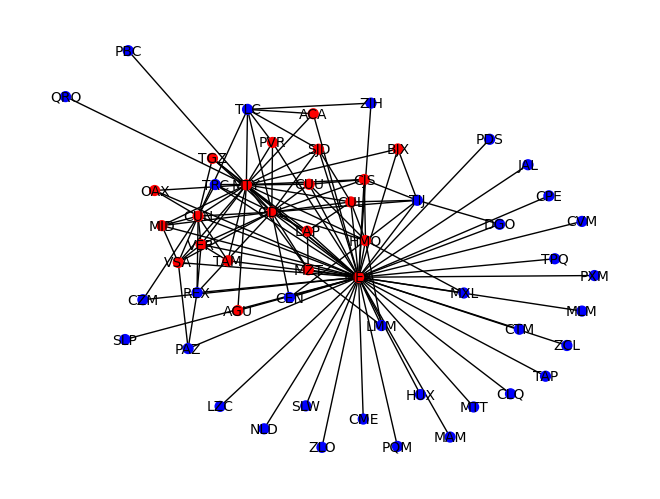

In [ ]:
#Imprimimos el grafo
nx.draw_spring(Mx_Graph, with_labels=True, node_size = 50, font_size=10, node_color=color_map)

### Aeropuertos más importantes

En el análisis de la red de aeropuertos mexicanos utilizando diferentes métricas de centralidad, se identificaron una serie de aeropuertos que se repiten en todas las listas de centralidad, incluyendo MEX, MTY, GDL, HMO, CJS, CUU, TLC, CEN, ACA y AGUA. Cada uno de estos aeropuertos juega un papel fundamental en la red de transporte aéreo de México, sin embargo, el Top 5 de aeropuertos que más se repiten son:

1. Aeropuerto Internacional de la ciudad de México
2. Aeropuerto Internacional de Monterrey
3. Aeropuerto Internacional de Guadalajara
4. Aeropuerto Internacional de Hermosillo
5. Aeropuerto Internacional de Ciudad Juárez o el Aeropuerto Internacional de Toluca, dependiendo de la métrica

Su importancia se puede interpretar de la siguiente manera:

1. MEX (Aeropuerto Internacional de la Ciudad de México):
        
    * Centralidad de Grado: MEX tiene un grado de centralidad de 0.944444d ebido a su amplia red de conexiones directas, tanto a nivel nacional como internacional. Es el aeropuerto más grande de México y uno de los más transitados de América Latina.

    * Centralidad de Intermediación: MEX también tiene una alta centralidad de intermediación (0.796743), ya que sirve como un importante punto de transferencia para vuelos nacionales e internacionales. Muchos pasajeros hacen conexiones en MEX para llegar a otros destinos en México y el extranjero.

    * Centralidad de Cercanía: MEX tiene una centralidad de cercanía significativa, con una puntuación de 0.947368, lo que significa que ofrece tiempos de viaje relativamente cortos a otros aeropuertos en la red. Esto lo convierte en una opción conveniente para los viajeros.

2. MTY (Aeropuerto Internacional de Monterrey):
    * Centralidad de Grado: MTY también tiene un alto grado de centralidad (0.425926)debido a su extensa red de vuelos nacionales e internacionales, sin embargo no se compara con el de la ciudad de México.
        
    * Centralidad de Intermediación: MTY desempeña un papel importante como centro de transferencia en el norte de México, lo que contribuye a su alta centralidad de intermediación (0.120018).
    
    * Centralidad de Cercanía: La centralidad de cercanía (0.635294) de MTY significa que ofrece conexiones rápidas y eficientes a otros aeropuertos del país y del extranjero.

3. GDL (Aeropuerto Internacional de Guadalajara):
      * Centralidad de Grado: GDL tiene el tercer lugar en grado de centralidad, con una puntuación de 0.370370. Esto que refleja su importancia como centro de conexiones en el oeste de México.
      
      * Centralidad de Intermediación: GDL también actúa como un punto clave para las conexiones por su puntación de 0.039533, especialmente en la región occidental del país.
      
      * Centralidad de Cercanía: Su centralidad de cercanía (0.613636) significa que también ofrece tiempos de viaje relativamente cortos a otros destinos, con su centralidad casi tan alta como la del aeropuerto de Monterrey.

6. Otros Aeropuertos repetidos: Los aeropuertos como HMO, CJS, CUU, TLC, CEN, ACA y AGUA también tienen características similares en términos de centralidad, lo que sugiere que son importantes para la conectividad y la transferencia de pasajeros en sus respectivas regiones geográficas. Sin embargo, la mayoría de los vuelos y la conectividad se concentra en 3 de las ciudades más grandes de México, CDMX, Monterrey y Guadalajara.

Estos aeropuertos repetidos en todas las métricas de centralidad desempeñan un papel esencial en la red de transporte aéreo de México. Actúan como puntos de conexión estratégicos que facilitan la movilidad de pasajeros y carga en todo el país y más allá. Su presencia en múltiples listas de centralidad subraya su relevancia crítica en el contexto de la aviación mexicana.

Hay varias razones por las cuales estos aeropuertos se repiten en las listas de centralidad:

  1. Ubicación estratégica: Muchos de estos aeropuertos se encuentran en ubicaciones estratégicas geográficamente. Por ejemplo, el Aeropuerto Internacional de la Ciudad de México (MEX) se ubica en la capital del país y actúa como el principal centro de conexiones tanto a nivel nacional como internacional.

  2. Volumen de tráfico: Los aeropuertos con un alto volumen de tráfico aéreo tienden a tener un alto grado de centralidad. Estos aeropuertos manejan una gran cantidad de vuelos y pasajeros, lo que los convierte en puntos críticos en la red de transporte.

  3. Conexiones nacionales e Internacionales: Aeropuertos como MEX, MTY y GDL ofrecen una amplia variedad de vuelos nacionales e internacionales, lo que los convierte en centros de transferencia clave para los viajeros que se desplazan dentro de México y hacia otros países.

  4. Importancia económica y comercial: La ubicación de estos aeropuertos en áreas con alta actividad económica y comercial también contribuye a su centralidad. Facilitan el transporte de mercancías y fomentan el crecimiento económico.

### Centro y periferia

El hecho de que todos los nodos de los aeropuertos de México pertenezcan a su centro o a su periferia, sin ninguno fuera de estos dos grupos, implica que la red tiene una estructura bien definida, donde los aeropuertos cumplen roles específicos como centrales o periféricos dadas sus características o factores geográficos, volúmenes de tráfico y diseño de rutas aéreas.

### Aplicaciones del análisis

Después de realizar este análisis utilizando NetworkX para calcular diversas métricas de centralidad en diversas redes de aeropuertos, se obtuvieron conclusiones que pueden ser útiles en una variedad de ámbitos. Algunos de los aprendizajes clave y la utilidad potencial de este análisis son los siguientes:

  1. Identificación de nodos clave: El análisis de centralidad permite identificar los nodos más importantes en una red. En el caso de la red de aeropuertos, esto ha permitido identificar los aeropuertos más cruciales en términos de conectividad y transferencia de pasajeros.

  2. Planificación de Infraestructura: La información sobre los aeropuertos más centrales puede ser valiosa para la planificación y el desarrollo de infraestructura de transporte aéreo. Esto puede incluir la expansión de aeropuertos clave, la mejora de las conexiones entre aeropuertos regionales y la toma de decisiones informadas sobre nuevas rutas.

  3. Optimización de rutas y conexiones: Las métricas de centralidad ayudan a las aerolíneas y operadores de aeropuertos a optimizar sus rutas y conexiones. Esto puede mejorar la eficiencia operativa y ofrecer a los viajeros más opciones de vuelo.

  4. Evaluación de resiliencia de la red: El análisis de centralidad también puede ser útil para evaluar la resiliencia de la red de transporte aéreo. Identificar los aeropuertos más centrales puede ayudar a anticipar el impacto de interrupciones en la operación de la red.

Este análisis de centralidad utilizando NetworkX proporciona información esencial para la toma de decisiones y la comprensión de la estructura y dinámica de las redes. Los hallazgos pueden ser valiosos en la toma de decisiones estratégicas en sectores como la aviación, la planificación urbana, la logística y más. Además, esta metodología es versátil y aplicable en una variedad de campos de estudio y áreas profesionales.